In [1]:
import pickle
import numpy as np

pickle_in = open("X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)

X_train = np.array(X_train/255.0)
y_train = np.array(y_train)

pickle_in = open("X_test.pickle","rb") 
X_test = pickle.load(pickle_in)

pickle_in = open("y_test.pickle","rb") 
y_test = pickle.load(pickle_in)

X_test = np.array(X_test/255.0) 
y_test = np.array(y_test)

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [3]:
model = tf.keras.models.Sequential()

model.add( tf.keras.layers.Conv2D(filters=16,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=X_train.shape[1:] ))
model.add( tf.keras.layers.MaxPool2D(pool_size=2, strides=2 ))


model.add( tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu' ))
model.add( tf.keras.layers.MaxPool2D(pool_size=2, strides=2 ))

model.add( tf.keras.layers.Conv2D(filters=64,padding='same',kernel_size=3, activation='relu' ))
model.add( tf.keras.layers.MaxPool2D(pool_size=2, strides=2 ))

model.add( tf.keras.layers.Conv2D(filters=128,padding='same',kernel_size=3, activation='relu' ))
model.add( tf.keras.layers.MaxPool2D(pool_size=2, strides=2 ))

model.add( tf.keras.layers.Flatten())
model.add( tf.keras.layers.Dense(units=256, activation='relu' ))
model.add( tf.keras.layers.Dense(units=128, activation='relu' ))
#model.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # for CNN_classification output

model.add( Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='linear')) #for_svm_classifier




In [4]:

model.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

r = model.fit(X_train, y_train, batch_size = 32, epochs = 5, validation_data =(X_test, y_test))

Epoch 1/5
36/36 [==============================] - 25s 704ms/step - loss: 0.5294 - accuracy: 0.6916 - val_loss: 0.2584 - val_accuracy: 0.9191
Epoch 2/5
36/36 [==============================] - 25s 694ms/step - loss: 0.2579 - accuracy: 0.8862 - val_loss: 0.2387 - val_accuracy: 0.9191
Epoch 3/5
36/36 [==============================] - 25s 693ms/step - loss: 0.1910 - accuracy: 0.9192 - val_loss: 0.1582 - val_accuracy: 0.9385
Epoch 4/5
36/36 [==============================] - 25s 690ms/step - loss: 0.1362 - accuracy: 0.9461 - val_loss: 0.1514 - val_accuracy: 0.9385
Epoch 5/5
36/36 [==============================] - 25s 698ms/step - loss: 0.0835 - accuracy: 0.9713 - val_loss: 0.1675 - val_accuracy: 0.9385


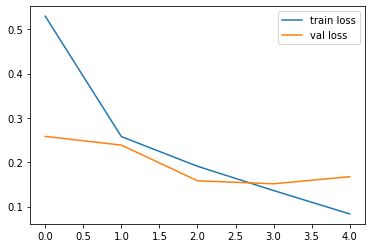

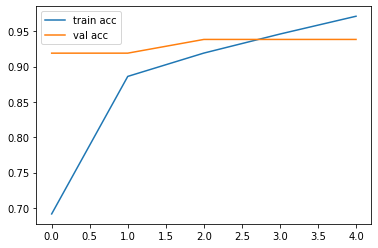

In [5]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()


# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       7

In [7]:
model.save("CNN_FOR_CYCLONE_DETECTION.h5")